## Install Libraries

In [1]:
!pip3 install -r requirements_current.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [3]:
import importlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import models
import parameters
import preprocessing

In [6]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/kevinchs0808/Desktop/DSA4263/final-project/preprocessing.py'>

# Helper Function

In [7]:
import shap
from sklearn.model_selection import StratifiedShuffleSplit
def explain_model(model, X_test, y_test):
        # Stratified sampling
        stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=100, random_state=42)
        _, sample_indices = next(stratified_split.split(X_test, y_test))
        X_sampled = X_test.iloc[sample_indices]

        explainer = shap.Explainer(model.predict, X_sampled)
        shap_values = explainer(X_sampled)
        shap.plots.beeswarm(shap_values)

#mlp_model.shap_explanation()

# Import Dataset

In [8]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [9]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [10]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [11]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [12]:
rf_model.train()
rf_model.predict()

In [13]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6363636363636364,
 'recall': 0.5714285714285714,
 'f1_score': 0.6021505376344085}

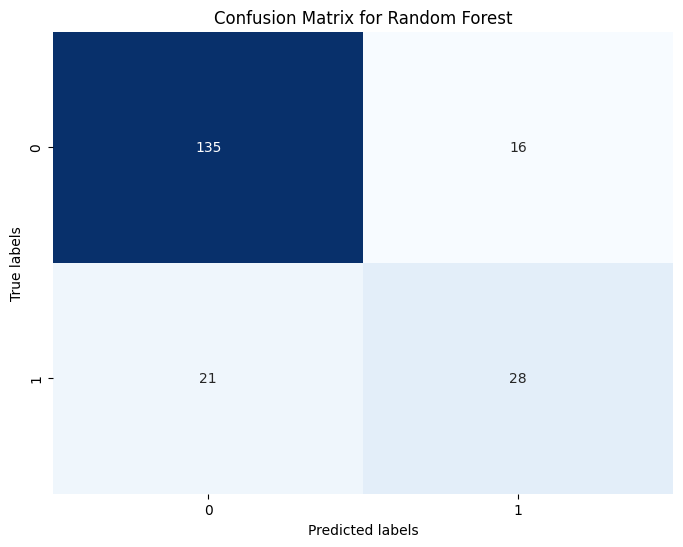

In [14]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [15]:
rf_model.finetune()

[I 2024-04-07 12:27:34,282] A new study created in memory with name: no-name-d9ab7ef1-b534-4aba-8b12-b3ed0a6e57fb
[I 2024-04-07 12:27:35,496] Trial 0 finished with value: 0.5802741115321229 and parameters: {'n_estimators': 13, 'max_depth': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.5802741115321229.
[I 2024-04-07 12:27:36,689] Trial 1 finished with value: 0.5846797973380252 and parameters: {'n_estimators': 14, 'max_depth': 2, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.5846797973380252.
[I 2024-04-07 12:27:37,852] Trial 2 finished with value: 0.3737498984167445 and parameters: {'n_estimators': 4, 'max_depth': 1, 'criterion': 'log_loss'}. Best is trial 1 with value: 0.5846797973380252.
[I 2024-04-07 12:27:39,016] Trial 3 finished with value: 0.5747318386462466 and parameters: {'n_estimators': 4, 'max_depth': 5, 'criterion': 'gini'}. Best is trial 1 with value: 0.5846797973380252.
[I 2024-04-07 12:27:40,178] Trial 4 finished with value: 0.4140231449965963 and p

(0.6419555745003315,
 {'n_estimators': 73, 'max_depth': 4, 'criterion': 'log_loss'})

In [16]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.631578947368421,
 'recall': 0.7346938775510204,
 'f1_score': 0.6792452830188679}

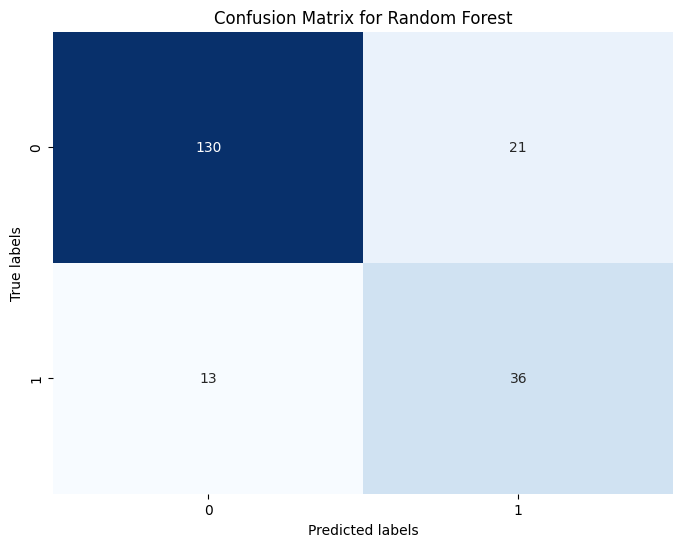

In [17]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

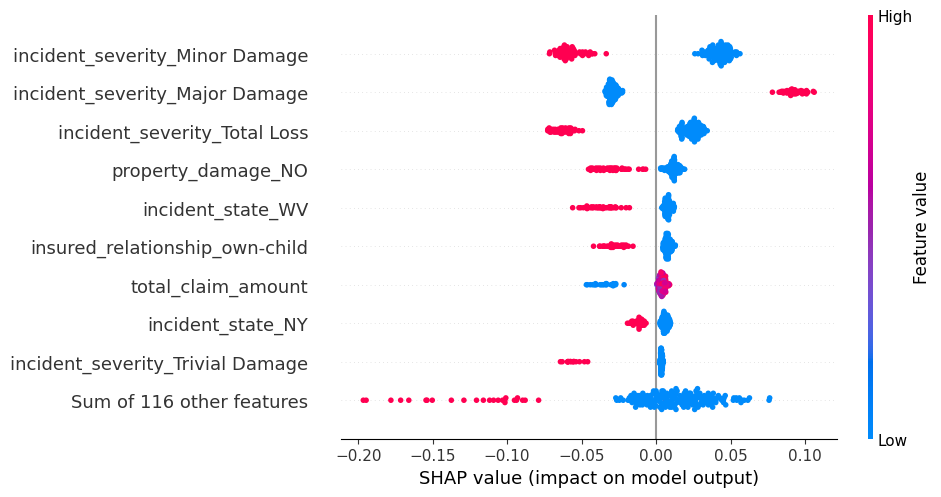

In [18]:
rf_model.shap_explanation(is_tree=True, class_to_observe=1)

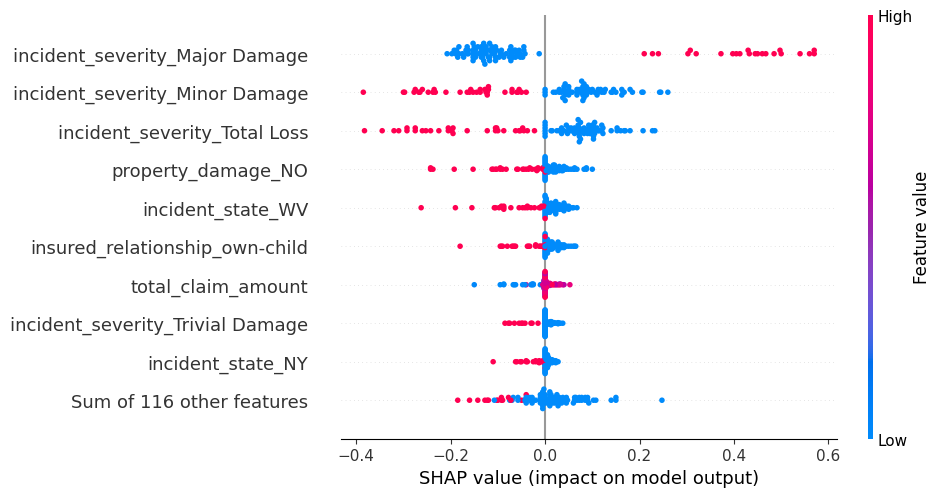

In [19]:
explain_model(rf_model.model, rf_model.X_test, rf_model.y_test)

# Decision Tree

In [20]:
import json
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [21]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [22]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [23]:
dt_model.train()
dt_model.predict()

In [24]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.765,
 'precision': 0.5178571428571429,
 'recall': 0.5918367346938775,
 'f1_score': 0.5523809523809524}

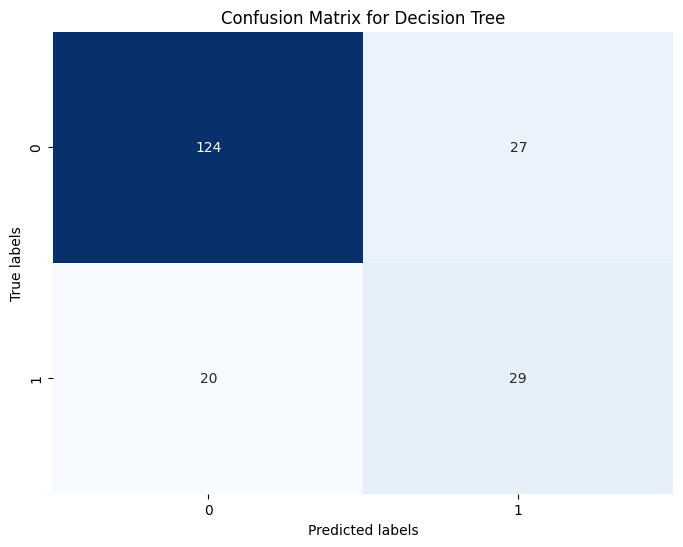

In [25]:
cm_dt_base = dt_model.plot_confusion_matrix()

## Results with Tuning

In [26]:
dt_model.finetune()

[I 2024-04-07 12:29:51,193] A new study created in memory with name: no-name-cbf5139b-a42b-492d-bdaa-30c1ea1e0022
[I 2024-04-07 12:29:52,350] Trial 0 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-07 12:29:53,508] Trial 1 finished with value: 0.6659290213363023 and parameters: {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6659290213363023.
[I 2024-04-07 12:29:54,658] Trial 2 finished with value: 0.6488716411101407 and parameters: {'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6659290213363023.
[I 2024-04-07 12:29:55,835] Trial 3 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6659290213363023.
[I 2024-04-07 12:29:57,032] Trial 4 finished with value: 0.6288224

(0.6659290213363023,
 {'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 1})

In [27]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.84,
 'precision': 0.639344262295082,
 'recall': 0.7959183673469388,
 'f1_score': 0.7090909090909091}

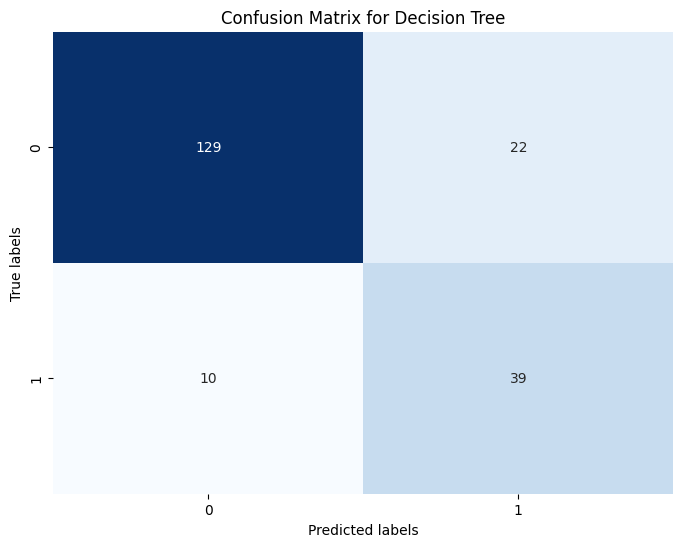

In [28]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

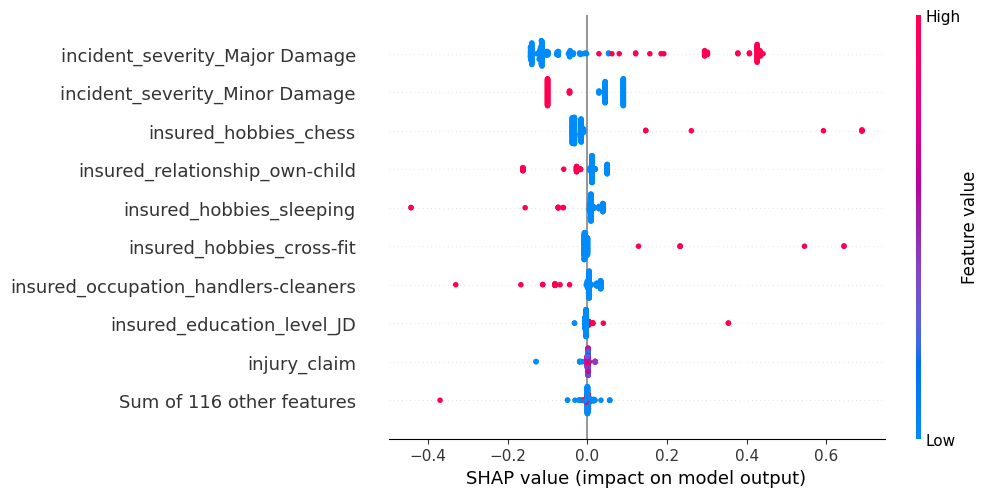

In [29]:
dt_model.shap_explanation(is_tree=True, class_to_observe=1)

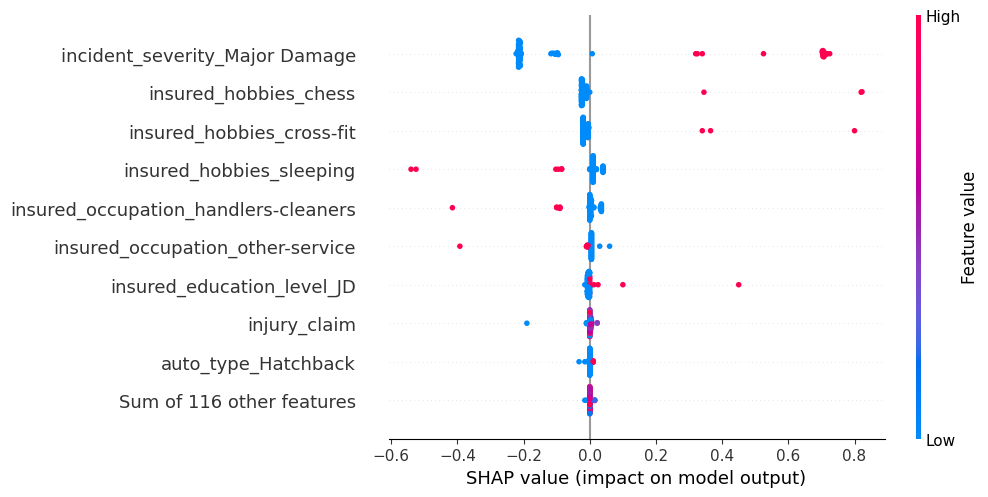

In [30]:
explain_model(dt_model.model, dt_model.X_test, dt_model.y_test)

[Text(0.52, 0.9, 'incident_severity_Major Damage <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [602, 602]\nclass = Y'),
 Text(0.26, 0.7, 'insured_hobbies_chess <= 0.5\ngini = 0.378\nsamples = 688\nvalue = [514, 174]\nclass = Y'),
 Text(0.16, 0.5, 'insured_hobbies_cross-fit <= 0.5\ngini = 0.342\nsamples = 654\nvalue = [511, 143]\nclass = Y'),
 Text(0.08, 0.3, 'incident_severity_Minor Damage <= 0.5\ngini = 0.299\nsamples = 622\nvalue = [508, 114]\nclass = Y'),
 Text(0.04, 0.1, 'gini = 0.402\nsamples = 355\nvalue = [256, 99]\nclass = Y'),
 Text(0.12, 0.1, 'gini = 0.106\nsamples = 267\nvalue = [252, 15]\nclass = Y'),
 Text(0.24, 0.3, 'insured_occupation_other-service <= 0.5\ngini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = N'),
 Text(0.2, 0.1, 'gini = 0.121\nsamples = 31\nvalue = [2, 29]\nclass = N'),
 Text(0.28, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Y'),
 Text(0.36, 0.5, 'policy_annual_premium <= 752.49\ngini = 0.161\nsamples = 34\nvalue = [3, 31]\nclass = N'),
 Text(0.3

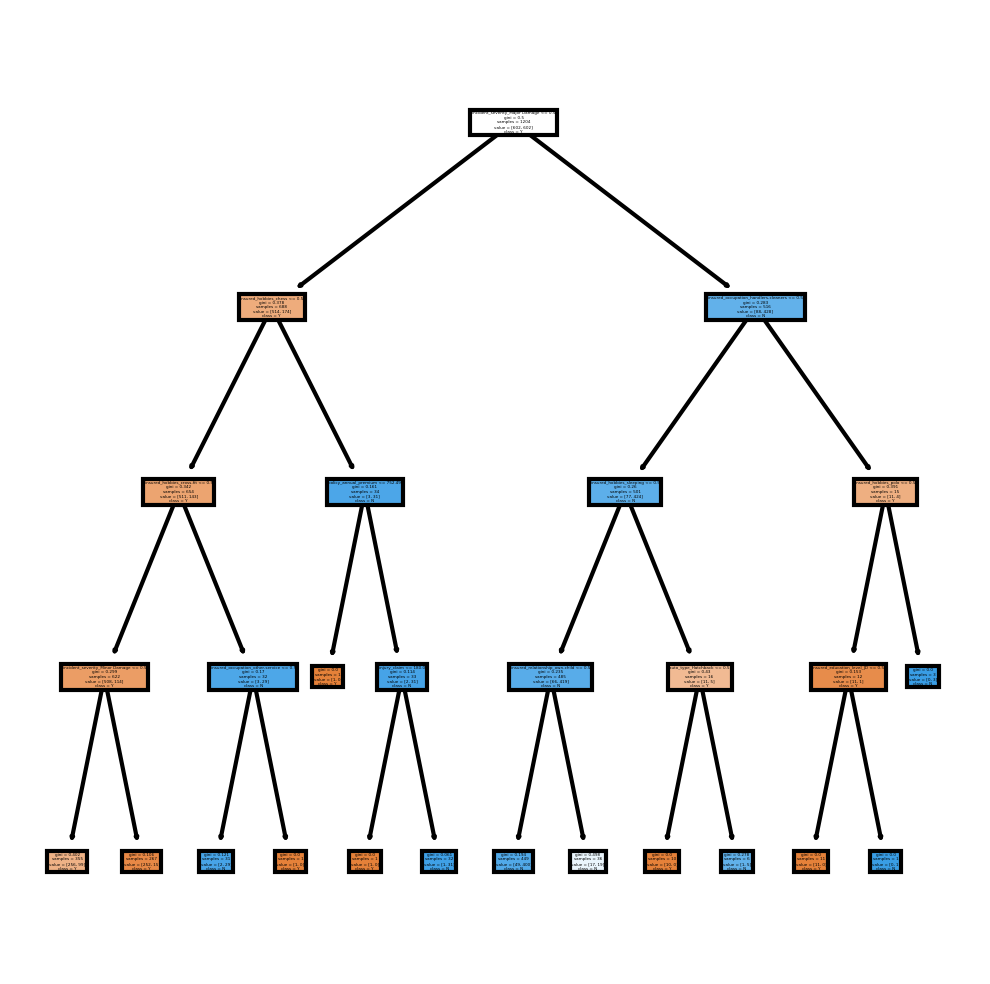

In [31]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

feature_names = list(dt_model.X_test.columns.copy())

class_names=['Y', 'N']

tree.plot_tree(dt_model.model,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)

# XGBoost

## Dataset Creation

In [32]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [33]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [34]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [35]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [36]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [37]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [38]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

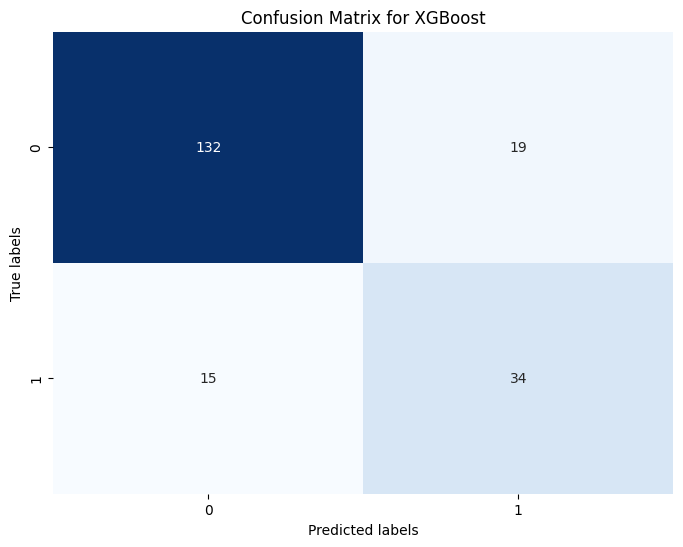

In [39]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [40]:
xgb_model.finetune()

[I 2024-04-07 12:31:52,697] A new study created in memory with name: no-name-a5d007ea-1f9c-4bcf-aa05-db9dc142e1a9
[I 2024-04-07 12:31:54,648] Trial 0 finished with value: 0.7561303759241904 and parameters: {'n_estimators': 317, 'max_depth': 21, 'learning_rate': 0.12, 'subsample': 0.4, 'colsample_bytree': 0.95, 'gamma': 2.6, 'reg_alpha': 3.3000000000000003, 'reg_lambda': 2.6}. Best is trial 0 with value: 0.7561303759241904.
[I 2024-04-07 12:31:55,561] Trial 1 finished with value: 0.6325766531373592 and parameters: {'n_estimators': 34, 'max_depth': 5, 'learning_rate': 0.33, 'subsample': 0.95, 'colsample_bytree': 0.30000000000000004, 'gamma': 2.6, 'reg_alpha': 2.1, 'reg_lambda': 4.6000000000000005}. Best is trial 0 with value: 0.7561303759241904.
[I 2024-04-07 12:31:56,457] Trial 2 finished with value: 0.7161163322865265 and parameters: {'n_estimators': 15, 'max_depth': 10, 'learning_rate': 0.34, 'subsample': 0.9000000000000001, 'colsample_bytree': 0.45, 'gamma': 0.8, 'reg_alpha': 3.80000

(0.7656723044207701,
 {'n_estimators': 11,
  'max_depth': 6,
  'learning_rate': 0.14,
  'subsample': 0.75,
  'colsample_bytree': 0.65,
  'gamma': 1.1,
  'reg_alpha': 4.6000000000000005,
  'reg_lambda': 0.9})

In [41]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.84,
 'precision': 0.6307692307692307,
 'recall': 0.8367346938775511,
 'f1_score': 0.7192982456140352}

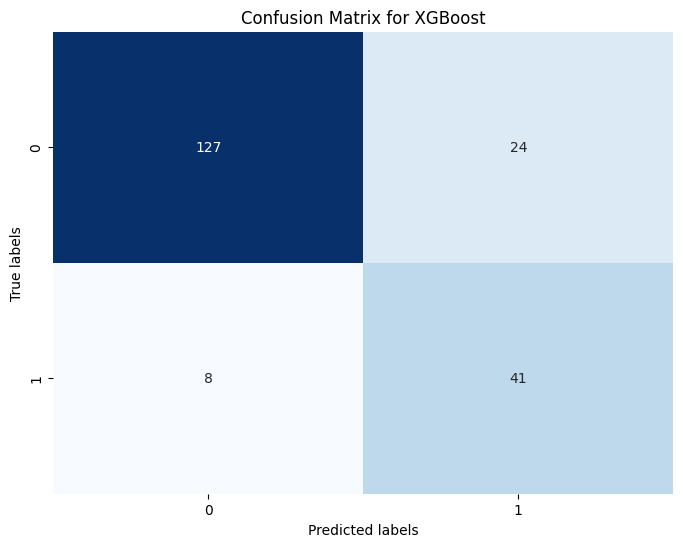

In [42]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

In [47]:
explain_model(xgb_model.model, xgb_model.X_test, xgb_model.y_test)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [43]:
xgb_model.shap_explanation()

Found a NULL input array in _cext_dense_tree_update_weights!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

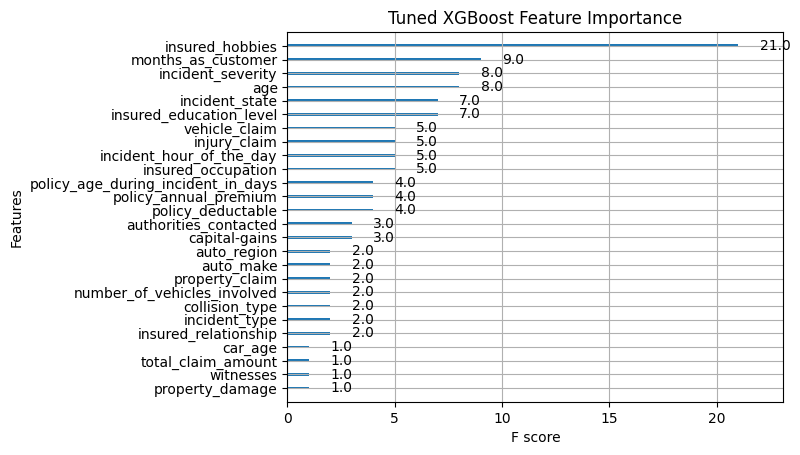

In [44]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")

# MLP

## Dataset creation

In [45]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True,
    )

In [46]:
from sklearn.neural_network import MLPClassifier
mlp_static_params = {
    "random_state": 42,
    "solver": "adam" # Enable categorical data
}
mlp_model = models.IndividualModel(
    model_func=MLPClassifier,
    param_info=parameters.MLP_INFORMATION,
    X_train=X_train_mlp,
    X_test=X_test_mlp,
    y_train=y_train_mlp,
    y_test=y_test_mlp,
    static_params = mlp_static_params
)

## Baseline

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create MLP classifier with solver='adam'
mlp_classifier = MLPClassifier(solver='adam', random_state = 42)

# Train the model
mlp_classifier.fit(X_train_mlp, y_train_mlp)

# Predict labels for the test set
y_pred = mlp_classifier.predict(X_test_mlp)

# Compute accuracy
accuracy = accuracy_score(y_test_mlp, y_pred)

# Compute precision
precision = precision_score(y_test_mlp, y_pred)

# Compute recall
recall = recall_score(y_test_mlp, y_pred)

# Compute F1-score
f1 = f1_score(y_test_mlp, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.795
Precision: 0.6428571428571429
Recall: 0.3673469387755102
F1-score: 0.4675324675324675


In [49]:
mlp_model.train_predict("RandomOverSampler")
mlp_model.evaluate()

{'accuracy': 0.27,
 'precision': 0.2512820512820513,
 'recall': 1.0,
 'f1_score': 0.4016393442622951}

In [50]:
mlp_model.finetune(oversampling_strategy = "RandomOverSampler")

[I 2024-04-07 12:36:04,276] A new study created in memory with name: no-name-35862256-fd00-4b99-adb6-2deed759e952
[I 2024-04-07 12:36:06,800] Trial 0 finished with value: 0.5662430824382821 and parameters: {'hidden_layer_sizes': 200, 'alpha': 0.0028, 'learning_rate_init': 0.0012000000000000001, 'max_iter': 600}. Best is trial 0 with value: 0.5662430824382821.
[I 2024-04-07 12:36:07,831] Trial 1 finished with value: 0.5218078733238134 and parameters: {'hidden_layer_sizes': 130, 'alpha': 0.0077, 'learning_rate_init': 0.006900000000000001, 'max_iter': 300}. Best is trial 0 with value: 0.5662430824382821.
[I 2024-04-07 12:36:08,795] Trial 2 finished with value: 0.4038931955211025 and parameters: {'hidden_layer_sizes': 60, 'alpha': 0.0079, 'learning_rate_init': 0.0071, 'max_iter': 300}. Best is trial 0 with value: 0.5662430824382821.
[I 2024-04-07 12:36:09,986] Trial 3 finished with value: 0.35380079690424515 and parameters: {'hidden_layer_sizes': 110, 'alpha': 0.0068000000000000005, 'learn

(0.6529640708317365,
 {'hidden_layer_sizes': 90,
  'alpha': 0.0064,
  'learning_rate_init': 0.0004,
  'max_iter': 600})

In [51]:
mlp_model.train_predict(oversampling_strategy = "RandomOverSampler")

mlp_model.evaluate()

{'accuracy': 0.77,
 'precision': 0.5789473684210527,
 'recall': 0.22448979591836735,
 'f1_score': 0.32352941176470584}

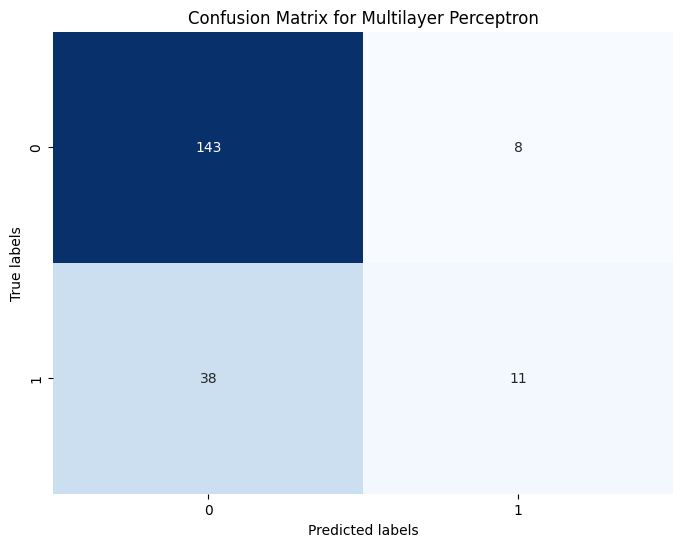

In [52]:
cm_mlp_tuned = mlp_model.plot_confusion_matrix()

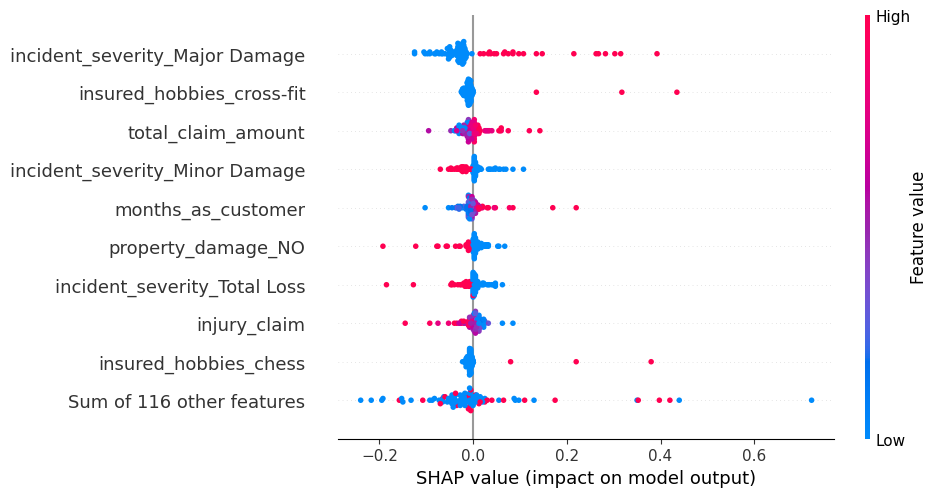

In [53]:
explain_model(mlp_model.model, mlp_model.X_test, mlp_model.y_test)

In [54]:
mlp_model.shap_explanation()

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPClassifier(alpha=0.0064, hidden_layer_sizes=90, learning_rate_init=0.0004,
              max_iter=600, random_state=42)